# Week 02: Linear Regression

As in the last class, we introduced you to python programming language and demonstrated the use of some basic library functions like numpy, pandas, matplotlib and scipy for scientific computing and use of ML techniques in engineering problems. Students are advised to import required libraires at the start of the code.

In this class we will learn how to implement the linear regression theory. We will start with one varible problem and then move on to multi variable problem.

The data for both sample and assignment problem will be given. Students need to run the program for their understanding and apply it to the given problem.

Steps:
1. Training data set
2. Evaluate cost function ($J$)
3. Apply optimization to update weights and biases
4. Plot $J$ vs no. of iterations

In [21]:
import os
import numpy as np
from matplotlib import pyplot as plt

## Univariate problem

Example: Now you will implement linear regression with one variable to predict stress in a material. Suppose you do not know the constitutive relation of the material. We have stress and strain data and we need to predict the stress in the material for a given strain.  

The file `ex2data1.txt` contains the dataset for our linear regression problem. The first column is the applied strain and the second column is the corresponding stress in GPa. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`:

(97, 2)
(97,)
(97,)


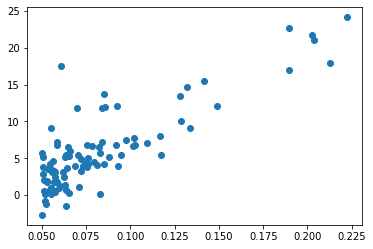

In [22]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
print(data.shape)
data1 = data[:,0]/100
print(data1.shape)
data2 = data[:,1]
print(data2.shape)
plt.plot(data1,data2,'o')
#np.savetxt('ex2data.txt', (data1,data2))
# data = np.loadtxt('ex2data.txt')
# plt.plot(data[:,0],data[:,1])

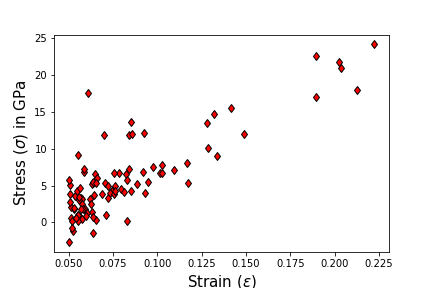

<a id="section2"></a>
### Gradient Descent

In this part, you will fit the linear regression parameters $w,w_0$ to our dataset using gradient descent.

#### Update Equations

The objective of linear regression is to minimize the cost function

$$ J(w) = \frac{1}{2m} \sum_{i=1}^m \left( h_{w}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_w(x)$ is given by the linear model
$$ h_w(x) = w^Tx +w_0 = w_1 x_1 +w_0 $$

Recall that the parameters of your model are the $w_j$ values. These are
the values you will adjust to minimize cost $J(w)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ w_j \leftarrow w_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_w(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } w_j \text{ for all } j$$

With each step of gradient descent, your parameters $w_j$ come closer to the optimal values that will achieve the lowest cost J($w$).

In [6]:
def costFunction(x,y,w):
  m=y.shape[0]
  J = 0
  J = (1/(2*m))*np.sum(np.square(np.matmul(x,w)-y))
  return J

In [23]:
print(data.shape)
m = data1.shape
x = np.stack([np.ones(m), data2])
print(x.shape)
y = data1
print(x)
print(y.shape)
data1,data2,

(97, 2)
(2, 97)
[[ 1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.       1.       1.       1.       1.       1.       1.       1.
   1.     ]
 [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
   6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  

In [12]:
J = costFunction(x,y,w=np.array([0.1,0.1]))

ValueError: ignored

### Optimization techniques
1. Batch Gradient Descent (BGD): Considers whole data
2. Mini-batch Gradient Descent: Randomly select a batch of data from the whole sample
3. Stochastic Gradient Descent (SGD): One data at a time. 
4. Sequential learning: Apply SGD and perform one epoch. Take the updated weights as initial guess for the weights and do the optimization. (Done in NN)

In [ ]:
np.random.random_sample?

### Learning rate ($\alpha$)
How to choose $\alpha$? (Variable learning rate)

Line Search method:

grad($x,y,w$)---> Calculate the gradient of $J$

ls_secant($x,y,w,d$)---> Line search code to optimize $\alpha$

AgradientDescent($x,y,w,iterations$)---> Gradient descent to optimize $w$

1. Choose initial guess ($w_0$) and $d_0$ = -grad$(x,y,w_0)$
   
   I). Optimize $\alpha_k$: ls_secant($x,y,w_k,d_0$)

      Initialize $\alpha_{curr}=\alpha_0$, $\alpha_1$, $(dphi_{zero}=d^T$(grad $J(w_0))$
      
      for all i do

      i) $\alpha_{old}$<--- $\alpha_{curr}$
      
      ii) $\alpha_{curr}$<--- $\alpha$
      
      iii)$dphi_{old}$<--- $(d^T$(grad $J(w_0))$
      
      iv) $w1_{p}$<--- $w_{k} -\alpha_{curr}*d$  (p=0:i)

      v) $dphi_{curr}$<---$(d^T$(grad $J(w_{p}))$

      vi) $\alpha$<---[$dphi_{curr}$$\alpha_{old} - dphi_{old}$$\alpha_{curr}$]/[$dphi_{curr}-dphi_{old}$]

      till (|$dphi_{curr}$|)> $\epsilon$($|dphi_{zero}|)$

      we get $\alpha_{k}$<---$\alpha$

2. $w_{k+1}$<---$( w_k -\alpha_kd)$ 
    
  $(d=-∇J(w_k))$
3. Call computeCost() and append the values of $J$

      


iii) $\alpha_{k+1}$<---$[(d^T $(grad $J(w))$*$\alpha_k - (d^T$(grad $J(w_0))$*$\alpha]$/$[(d^T $(grad $J(w))$ - $d^T$(grad $J(w_0))]$

      till $(|(d^T)$(grad $J(w))|> epsilon*|(d^T)$(grad $J(w_0))|)$

### Visualization
3D surface plots
Contour plots

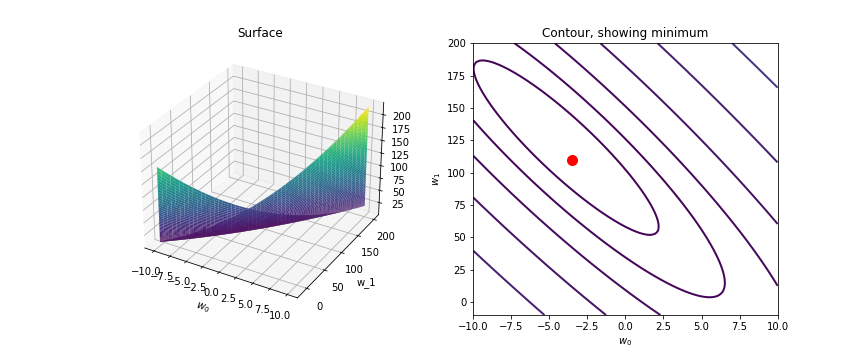

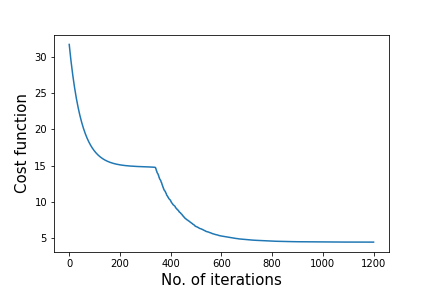

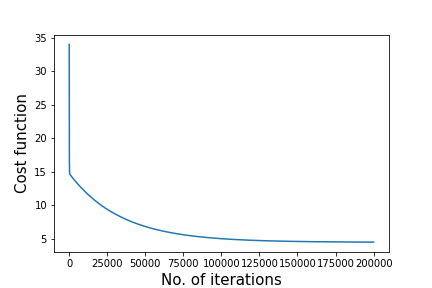

BGD

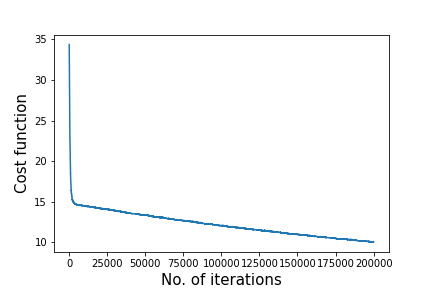

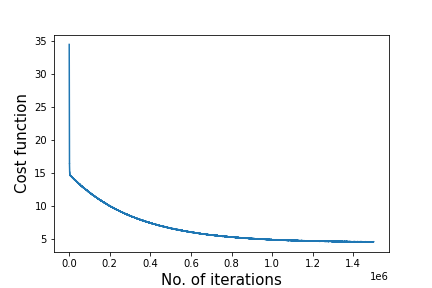

mini-batch 

## Multivariate Regression

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex2data2.txt` contains a training set of housing prices in Delhi. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house.

### Feature Scaling
1. Take largest value and divide all numbers
2. Mean normalization

In [ ]:
# Load data
data = np.loadtxt(('ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size    #47
#print(m) # To know the size of the dataset.

# print out some data points
print('{:>8s}{:>9s}{:>9s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0]  X[:, 1]        y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


## Normal equations

The closed-form solution to linear regression is

$$ w = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($w_0$). The code in the next cell will add the column of 1’s to X for you.